# **CAP 5768: Introduction to Data Science**
## Final Project Program: Visualization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('../../cleaned_dataset.csv')

# Set seaborn style
sns.set_style("whitegrid")

pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'Overall AQI']

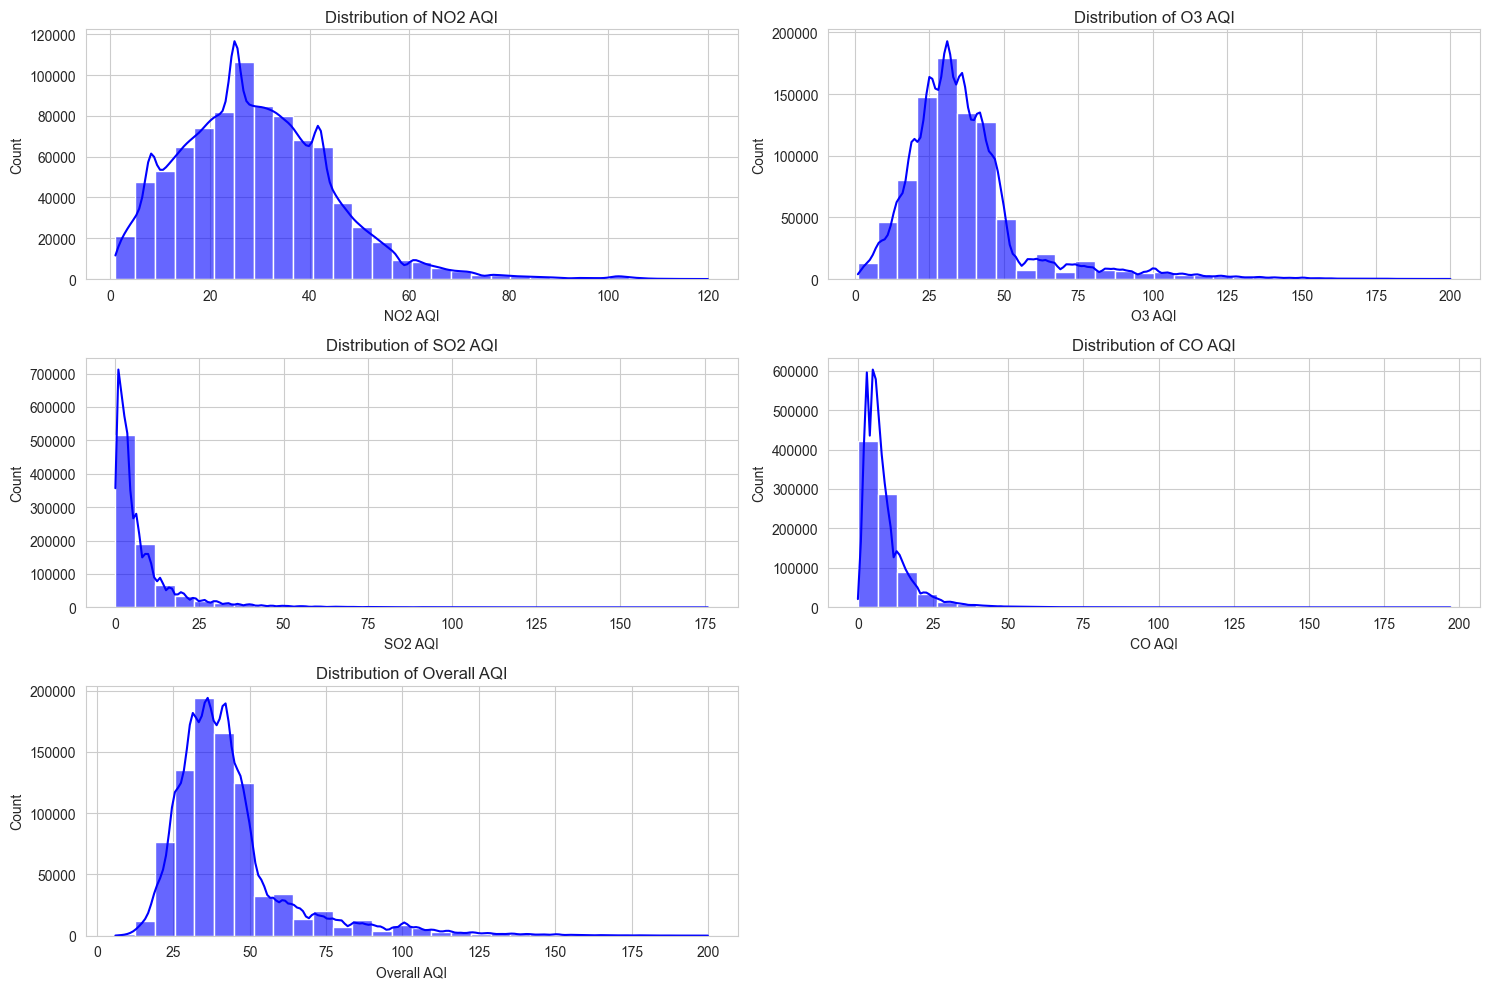

In [17]:
# Histograms & Density Plots
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[pollutant], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f"Distribution of {pollutant}")

plt.tight_layout()
plt.show()

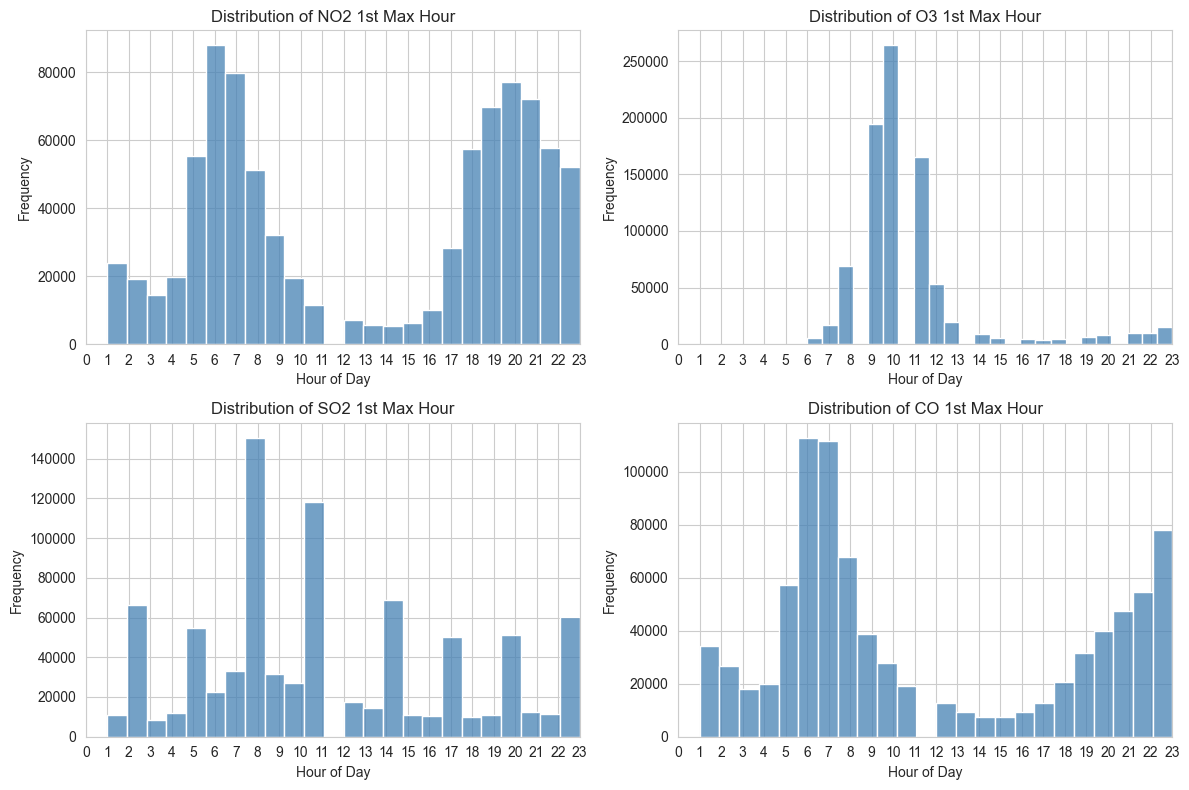

In [18]:
# Set style
sns.set_style("whitegrid")

# List of '1st Max Hour' columns
hour_columns = ['NO2 1st Max Hour', 'O3 1st Max Hour', 'SO2 1st Max Hour', 'CO 1st Max Hour']

# Create subplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(hour_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=24, kde=False, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Frequency')
    plt.xticks(range(0, 24, 1))
    plt.xlim(0, 23)

plt.tight_layout()
plt.show()

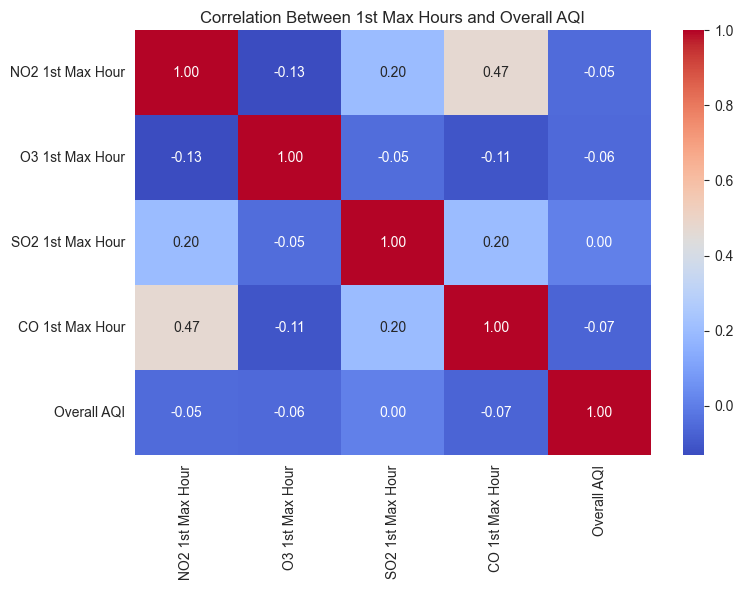

In [19]:
# Select only hour columns + Overall AQI
hour_features = ['NO2 1st Max Hour', 'O3 1st Max Hour', 'SO2 1st Max Hour', 'CO 1st Max Hour', 'Overall AQI']

# Compute correlation
corr = data[hour_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between 1st Max Hours and Overall AQI")
plt.tight_layout()
plt.show()


In [ ]:
# NO2 Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['NO2 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for NO2 AQi")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# O3 Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['O3 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for O3 AQI")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# SO2 Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['SO2 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for SO2 AQI")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# CO Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['CO AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for CO AQI")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = data[pollutants].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

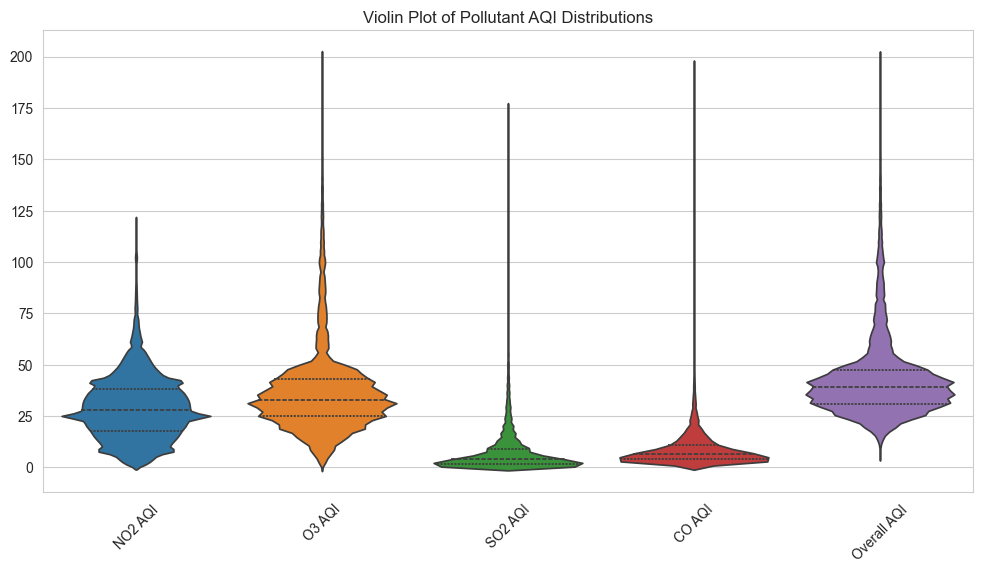

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[pollutants], inner="quartile")
plt.title("Violin Plot of Pollutant AQI Distributions")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Ignore this one, have no idea what it shows

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Copy the DataFrame to preserve the original
df = data.copy()

# Step 2: Define AQI categories
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI Category'] = pd.cut(df['Overall AQI'], bins=bins, labels=labels)

# Step 3: Choose features for the pairplot
selected_features = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'Overall AQI', 'AQI Category']
sample_df = df[selected_features].sample(1000, random_state=42)

# Step 4: Define AQI severity color palette
aqi_palette = {
    'Good': '#00e400',                      # Green
    'Moderate': '#ffff00',                  # Yellow
    'Unhealthy for Sensitive Groups': '#ff7e00',  # Orange
    'Unhealthy': '#ff0000',                 # Red
    'Very Unhealthy': '#8f3f97',            # Purple
    'Hazardous': '#7e0023'                  # Maroon
}

# Step 5: Create the pairplot
sns.pairplot(sample_df, hue='AQI Category', palette=aqi_palette, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Pollutant AQIs Colored by AQI Category (EPA Colors)', y=1.02)
plt.show()



In [ ]:
pollutant_proportions = data[pollutants].div(data["Overall AQI"], axis=0).mean()

plt.figure(figsize=(10, 6))
pollutant_proportions.plot(kind="bar", colormap="coolwarm", alpha=0.75)
plt.title("Average Contribution of Pollutants to Overall AQI")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.kdeplot(data[pollutant], label=pollutant, fill=True, alpha=0.3)
plt.title("KDE Plot of AQI Distributions")
plt.legend()
plt.xlabel("AQI Value")

plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_16712\91670233.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


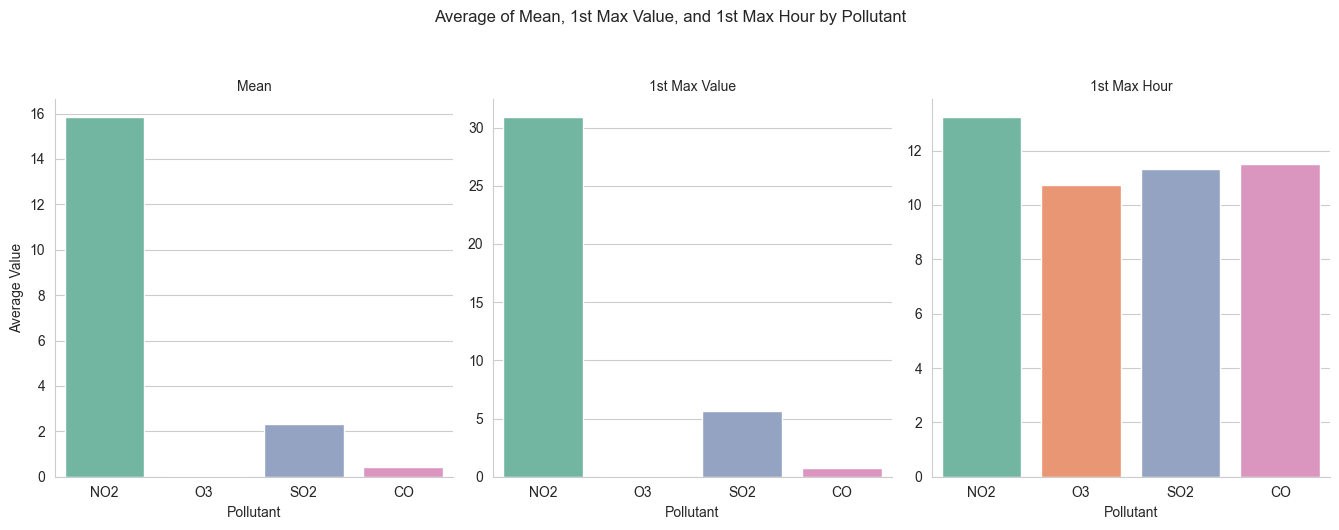

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define pollutants and metrics
pollutants = ['NO2', 'O3', 'SO2', 'CO']
metrics = ['Mean', '1st Max Value', '1st Max Hour']

# Step 2: Build a long-format DataFrame for plotting
records = []

for pollutant in pollutants:
    for metric in metrics:
        col_name = f'{pollutant} {metric}'
        if col_name in data.columns:
            avg_val = data[col_name].mean(skipna=True)
            records.append({
                'Pollutant': pollutant,
                'Metric': metric,
                'Average Value': avg_val
            })

df_plot = pd.DataFrame(records)

# Step 3: Create separate subplots for each metric
g = sns.catplot(
    data=df_plot,
    x='Pollutant',
    y='Average Value',
    col='Metric',
    kind='bar',
    palette='Set2',
    sharey=False,
    height=5,
    aspect=0.9
)

# Step 4: Title and axis formatting
g.fig.suptitle("Average of Mean, 1st Max Value, and 1st Max Hour by Pollutant", y=1.05)
g.set_axis_labels("Pollutant", "Average Value")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=0)

plt.tight_layout()
plt.show()


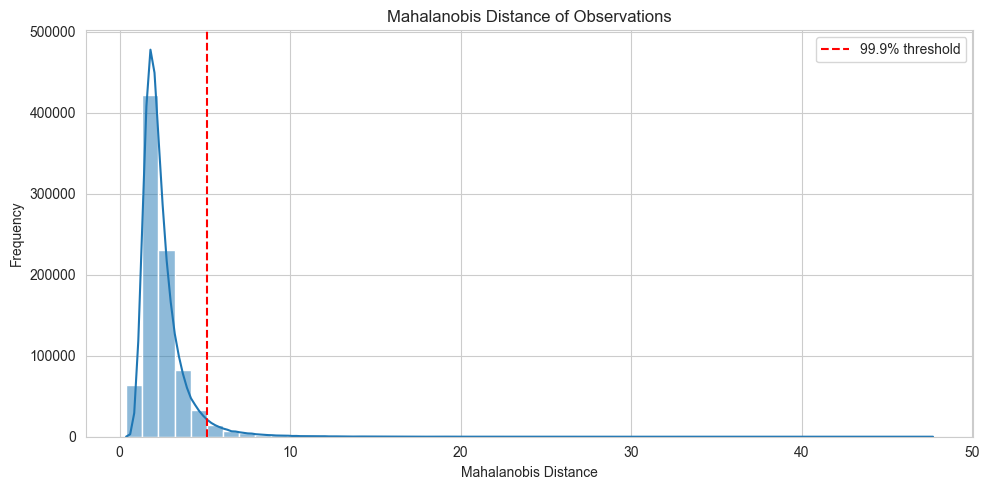

     NO2 Mean   O3 Mean  SO2 Mean   CO Mean  NO2 1st Max Value  \
0   19.041667  0.022500  3.000000  1.145833               49.0   
2   19.041667  0.022500  2.975000  1.145833               49.0   
6   38.125000  0.007958  5.250000  1.929167               51.0   
8   38.125000  0.007958  5.200000  1.929167               51.0   
10  40.260870  0.014167  7.083333  1.991667               74.0   

    O3 1st Max Value  SO2 1st Max Value  CO 1st Max Value  Mahalanobis  \
0              0.040                9.0               4.2     6.517259   
2              0.040                6.6               4.2     6.518674   
6              0.016               11.0               4.4     5.553878   
8              0.016                8.3               4.4     5.574684   
10             0.033               16.0               5.1     6.295547   

    Outlier  
0      True  
2      True  
6      True  
8      True  
10     True  


In [17]:

from scipy.stats import chi2
from numpy.linalg import inv

# Step 1: Select features for multivariate analysis
features = [
    'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean',
    'NO2 1st Max Value', 'O3 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value'
]
X = data[features].dropna()

# Step 2: Calculate Mahalanobis distance
mean_vec = X.mean().values
cov_matrix = np.cov(X.values, rowvar=False)
inv_cov_matrix = inv(cov_matrix)

def mahalanobis(x, mean, inv_cov):
    delta = x - mean
    return np.sqrt(np.dot(np.dot(delta, inv_cov), delta.T))

X['Mahalanobis'] = X.apply(lambda row: mahalanobis(row.values, mean_vec, inv_cov_matrix), axis=1)

# Step 3: Determine threshold (e.g., 99.9% confidence level)
threshold = np.sqrt(chi2.ppf(0.999, df=len(features)))

# Step 4: Flag outliers
X['Outlier'] = X['Mahalanobis'] > threshold

# Step 5: Visualize
plt.figure(figsize=(10, 5))
sns.histplot(X['Mahalanobis'], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='99.9% threshold')
plt.title("Mahalanobis Distance of Observations")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: View top outliers
outliers = X[X['Outlier']]
print(outliers.head())


In [ ]:
# Drop non-numeric columns (like AQI Category)
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation with Overall AQI and sort
correlations = numeric_data.corr()['Overall AQI'].drop('Overall AQI').sort_values()

# Turn into DataFrame for seaborn plotting
corr_df = correlations.reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')

# Add value annotations
for index, row in corr_df.iterrows():
    plt.text(x=row['Correlation'], y=index, 
             s=f"{row['Correlation']:.2f}", 
             va='center', ha='right' if row['Correlation'] < 0 else 'left', 
             fontsize=9, color='black')

plt.title('Feature Correlation with Overall AQI')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#This one's not very insightful

# Step 1: Bin Overall AQI into categories (if not already done)
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
data['AQI Category'] = pd.cut(data['Overall AQI'], bins=bins, labels=labels)

# Step 2: Choose a few key features to avoid overplotting
selected_features = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'AQI Category']

# Step 3: Create pairplot
sns.pairplot(data[selected_features], hue='AQI Category', palette='Spectral', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Pollutant AQIs Colored by AQI Category', y=1.02)
plt.show()